# Dataset

In this Notebook we are going to use an[ opinion poll Chilean dataset](https://github.com/MinCiencia/Politicas). Our main goal is to teach the pipeline of cleaning a spanish text.


In [ ]:
!git clone https://github.com/MinCiencia/Politicas

Cloning into 'Politicas'...
remote: Enumerating objects: 522, done.
remote: Counting objects: 100% (522/522), done.
remote: Compressing objects: 100% (336/336), done.
remote: Total 522 (delta 214), reused 380 (delta 131), pack-reused 0
Receiving objects: 100% (522/522), 34.14 MiB | 33.71 MiB/s, done.
Resolving deltas: 100% (214/214), done.


In [ ]:
import pandas as pd
consulta = pd.read_csv('/content/Politicas/Politica_Igualdad_de_Genero/bbdd_consulta_publica.csv')
consulta = consulta[["P1 TRANSCRIPCIÓN: ¿Por qué cree ud. que Chile necesita una política de igualdad de género en CTCI?", "P2 TRANSCRIPCIÓN: ¿Qué medidas cree usted que garantizan el acceso, el desarrollo y el liderazgo de mujeres en el sistema CTCI?","P3 TRANSCRIPCIÓN: Respecto al Eje 2, ¿de qué manera se podría incorporar la perspectiva de género en su disciplina o área de desempeño?",'P4 TRANSCRIPCIÓN: Teniendo en cuenta el Eje 3, ¿qué acciones debería adoptar su institución  y otras instituciones del sistema de CTCI  para garantizar una  política de igualdad de género efectiva?']]
print('Datos con valores NaN: ',len(consulta))
consulta = consulta.dropna(axis=0)
print('Datos sin valores NaN: ',len(consulta))

Datos con valores NaN:  1524
Datos sin valores NaN:  1342


# NLP cleaning Data Pipeline

The goal of this stage is to remove irrelevant parts of our data before we use it to create our model. The definition of “irrelevant parts” varies between problems and datasets and, in real-world problems can be experimented to find the best way.

The script will divide the data cleaning in the following sections:

1. Exploring the dataset
2.   Removing punctuation
3.   Removing line breaks and extra whitespaces
4.Normalize text
5.Removing accents
6.Stemming
7.Lemmatization
8. Removing stopwords
9. Removing twitter nicknames, emails and numbers
10. Word and Sentence Tokenization






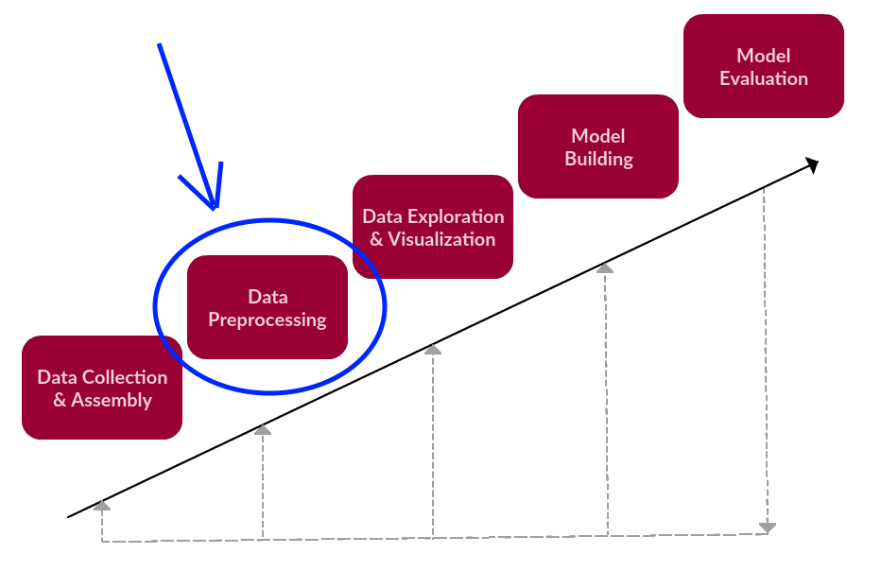

## 1. Exploring the dataset
Before making design decisions or creating a model, we have to get to know our data. So first of all let's answer some questions regarding our dataset:



*   How long are the answers? The longest answer? Shortest answer?

*   What are the most frequent words in the opinion poll? 

For this questions we will use only the first column of the dataset: *'P1 TRANSCRIPCIÓN: ¿Por qué cree ud. que Chile necesita una política de igualdad de género en CTCI?'*



Mean answer length:  199.84202682563338
Min answer length:  2
Max answer length:  4388


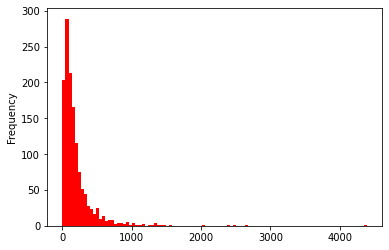

In [ ]:
consulta['length_data'] = consulta['P1 TRANSCRIPCIÓN: ¿Por qué cree ud. que Chile necesita una política de igualdad de género en CTCI?'].apply(len)
print("Mean answer length: ", consulta['length_data'].mean())
print("Min answer length: ", consulta['length_data'].min())
print("Max answer length: ", consulta['length_data'].max())
consulta['length_data'].plot.hist(bins=100, color='r')

In [ ]:
#Longest answer
print('Length of the longest answer:', len(max(consulta['P1 TRANSCRIPCIÓN: ¿Por qué cree ud. que Chile necesita una política de igualdad de género en CTCI?'].tolist(), key=len)))
answer = max(consulta['P1 TRANSCRIPCIÓN: ¿Por qué cree ud. que Chile necesita una política de igualdad de género en CTCI?'].tolist(), key=len)[0:1898]
print(answer)

Length of the longest answer: 4388
Chile no necesita una política de igualdad de género y estas son las razones:
1. Las diferencias en porcentajes de matrículas entre hombres y mujeres, no se deben a discriminación, sesgos implícitos o estereotipos en contra de la mujer; se deben, por el contrario, a diferencias en intereses entre hombres y mujeres que se derivan de las diferencias sexuales. Esas diferencias son bien conocidas y se resumen en que los hombres, en general, se inclinan hacia la sistematización y prefieren trabajar con cosas; mientras que, las mujeres, se inclinan hacia la empatía y prefieren trabajar con personas. Por tanto, la mayor proporción de hombres en carreras de ciencia y tecnología son bien explicadas por las diferencias en intereses académicos. Así como no existe discriminación en contra de los hombres por su baja representación en carreras de la salud y educación, no existe discriminación en contra de la mujer por su menor representación en áreas de la ciencia 

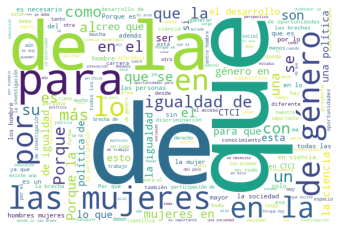

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

text = list(consulta['P1 TRANSCRIPCIÓN: ¿Por qué cree ud. que Chile necesita una política de igualdad de género en CTCI?'].values)
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="white",width=600, height=400, max_font_size=200).generate(str(text))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Brindar:1
oportunidades:138
restitutivas:1
de:2576
desigualdades:21
estructurales:5
en:1471
la:1460
educación:26
nacionalpara:1
construir:17


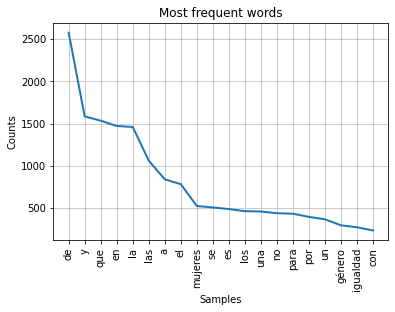

In [ ]:
import nltk

dataset= ''

for i in consulta['P1 TRANSCRIPCIÓN: ¿Por qué cree ud. que Chile necesita una política de igualdad de género en CTCI?'].tolist():
  dataset += "".join(i)

#Counting the frequence of each word in the dataset using nltk
freq = nltk.FreqDist([t for t in dataset.split()])

ct = 0
for key,val in freq.items():
    print (str(key) + ':' + str(val))
    if ct == 10:
      break
    ct=ct+1
plt.title('Most frequent words')
freq.plot(20,  cumulative=False)


## 2. Removing punctuation

The part of replacing with punctuation can be performed using regex or string.


In [ ]:
#Longest answer
print(answer)

Chile no necesita una política de igualdad de género y estas son las razones:
1. Las diferencias en porcentajes de matrículas entre hombres y mujeres, no se deben a discriminación, sesgos implícitos o estereotipos en contra de la mujer; se deben, por el contrario, a diferencias en intereses entre hombres y mujeres que se derivan de las diferencias sexuales. Esas diferencias son bien conocidas y se resumen en que los hombres, en general, se inclinan hacia la sistematización y prefieren trabajar con cosas; mientras que, las mujeres, se inclinan hacia la empatía y prefieren trabajar con personas. Por tanto, la mayor proporción de hombres en carreras de ciencia y tecnología son bien explicadas por las diferencias en intereses académicos. Así como no existe discriminación en contra de los hombres por su baja representación en carreras de la salud y educación, no existe discriminación en contra de la mujer por su menor representación en áreas de la ciencia y tecnología.

2. Generalización de

**Method 1#:** Define a function that will remove punctuation using string library.

In [ ]:
import string

def removePunctWithStr(text): 
    text= ''.join([char for char in text if char not in string.punctuation])
    return text

removePunctWithStr(answer)

'Chile no necesita una política de igualdad de género y estas son las razones\n1 Las diferencias en porcentajes de matrículas entre hombres y mujeres no se deben a discriminación sesgos implícitos o estereotipos en contra de la mujer se deben por el contrario a diferencias en intereses entre hombres y mujeres que se derivan de las diferencias sexuales Esas diferencias son bien conocidas y se resumen en que los hombres en general se inclinan hacia la sistematización y prefieren trabajar con cosas mientras que las mujeres se inclinan hacia la empatía y prefieren trabajar con personas Por tanto la mayor proporción de hombres en carreras de ciencia y tecnología son bien explicadas por las diferencias en intereses académicos Así como no existe discriminación en contra de los hombres por su baja representación en carreras de la salud y educación no existe discriminación en contra de la mujer por su menor representación en áreas de la ciencia y tecnología\n\n2 Generalización del punto anterio

**Method 2#:** Define a function that will remove punctuation using regex library.



In [ ]:
import re

def removePunctWithRegex(text): 
    text= re.sub(r'([\'\"\.\(\)\!\?\\\/\,])', r' \1 ', text)
    text = re.sub(r'[^\w\s\?]', ' ', text)
    return text

removePunctWithRegex(answer)

'Chile no necesita una política de igualdad de género y estas son las razones \n1    Las diferencias en porcentajes de matrículas entre hombres y mujeres    no se deben a discriminación    sesgos implícitos o estereotipos en contra de la mujer  se deben    por el contrario    a diferencias en intereses entre hombres y mujeres que se derivan de las diferencias sexuales    Esas diferencias son bien conocidas y se resumen en que los hombres    en general    se inclinan hacia la sistematización y prefieren trabajar con cosas  mientras que    las mujeres    se inclinan hacia la empatía y prefieren trabajar con personas    Por tanto    la mayor proporción de hombres en carreras de ciencia y tecnología son bien explicadas por las diferencias en intereses académicos    Así como no existe discriminación en contra de los hombres por su baja representación en carreras de la salud y educación    no existe discriminación en contra de la mujer por su menor representación en áreas de la ciencia y tec


## 3. Removing line breaks and extra whitespaces

Sometimes the string is very long and includes many line breaks, so it's necessary  to remove all this extra characters. 

In [ ]:
#Using the answer without punctuation 
answer_removed_punct = removePunctWithRegex(answer)
print(answer_removed_punct)

Chile no necesita una política de igualdad de género y estas son las razones 
1    Las diferencias en porcentajes de matrículas entre hombres y mujeres    no se deben a discriminación    sesgos implícitos o estereotipos en contra de la mujer  se deben    por el contrario    a diferencias en intereses entre hombres y mujeres que se derivan de las diferencias sexuales    Esas diferencias son bien conocidas y se resumen en que los hombres    en general    se inclinan hacia la sistematización y prefieren trabajar con cosas  mientras que    las mujeres    se inclinan hacia la empatía y prefieren trabajar con personas    Por tanto    la mayor proporción de hombres en carreras de ciencia y tecnología son bien explicadas por las diferencias en intereses académicos    Así como no existe discriminación en contra de los hombres por su baja representación en carreras de la salud y educación    no existe discriminación en contra de la mujer por su menor representación en áreas de la ciencia y tecno

**Method 1#:** Using replace method.

In [ ]:
def removeLines(text):
  text = ' '.join(text.split())
  return text.replace('\n','')

removeLines(answer_removed_punct)

'Chile no necesita una política de igualdad de género y estas son las razones 1 Las diferencias en porcentajes de matrículas entre hombres y mujeres no se deben a discriminación sesgos implícitos o estereotipos en contra de la mujer se deben por el contrario a diferencias en intereses entre hombres y mujeres que se derivan de las diferencias sexuales Esas diferencias son bien conocidas y se resumen en que los hombres en general se inclinan hacia la sistematización y prefieren trabajar con cosas mientras que las mujeres se inclinan hacia la empatía y prefieren trabajar con personas Por tanto la mayor proporción de hombres en carreras de ciencia y tecnología son bien explicadas por las diferencias en intereses académicos Así como no existe discriminación en contra de los hombres por su baja representación en carreras de la salud y educación no existe discriminación en contra de la mujer por su menor representación en áreas de la ciencia y tecnología 2 Generalización del punto anterior de

**Method 2#:** Define a function that will remove line breaks using regex library.


In [ ]:
def removeLinesRegex(text):
  text = re.sub(r'([\;\:\|•«\n])', ' ', text)
  text = re.sub(r'\s+', ' ', text).strip()
  return text

removeLinesRegex(answer_removed_punct)

'Chile no necesita una política de igualdad de género y estas son las razones 1 Las diferencias en porcentajes de matrículas entre hombres y mujeres no se deben a discriminación sesgos implícitos o estereotipos en contra de la mujer se deben por el contrario a diferencias en intereses entre hombres y mujeres que se derivan de las diferencias sexuales Esas diferencias son bien conocidas y se resumen en que los hombres en general se inclinan hacia la sistematización y prefieren trabajar con cosas mientras que las mujeres se inclinan hacia la empatía y prefieren trabajar con personas Por tanto la mayor proporción de hombres en carreras de ciencia y tecnología son bien explicadas por las diferencias en intereses académicos Así como no existe discriminación en contra de los hombres por su baja representación en carreras de la salud y educación no existe discriminación en contra de la mujer por su menor representación en áreas de la ciencia y tecnología 2 Generalización del punto anterior de

## 4. Normalize text
Normalizing text means standardizing capitalization so that machine models don't group capitalized words as different from their lowercase counterparts. Anyway there are models that recognize cased sentences (for example: transformers).

In [ ]:
def uncased(text):
  return text.lower()

cleaned_ans = uncased(removeLinesRegex(removePunctWithRegex(answer)))
print(cleaned_ans)

chile no necesita una política de igualdad de género y estas son las razones 1 las diferencias en porcentajes de matrículas entre hombres y mujeres no se deben a discriminación sesgos implícitos o estereotipos en contra de la mujer se deben por el contrario a diferencias en intereses entre hombres y mujeres que se derivan de las diferencias sexuales esas diferencias son bien conocidas y se resumen en que los hombres en general se inclinan hacia la sistematización y prefieren trabajar con cosas mientras que las mujeres se inclinan hacia la empatía y prefieren trabajar con personas por tanto la mayor proporción de hombres en carreras de ciencia y tecnología son bien explicadas por las diferencias en intereses académicos así como no existe discriminación en contra de los hombres por su baja representación en carreras de la salud y educación no existe discriminación en contra de la mujer por su menor representación en áreas de la ciencia y tecnología 2 generalización del punto anterior de 

## 5. Removing accents
Unicode library transliterates any unicode string into the closest possible representation in ascii text.

In [ ]:
import unicodedata
def strip_accents(text):
   return ''.join(c for c in unicodedata.normalize('NFD', text) if unicodedata.category(c) != 'Mn')

ans_without_accents = strip_accents(cleaned_ans)
print(ans_without_accents)

chile no necesita una politica de igualdad de genero y estas son las razones 1 las diferencias en porcentajes de matriculas entre hombres y mujeres no se deben a discriminacion sesgos implicitos o estereotipos en contra de la mujer se deben por el contrario a diferencias en intereses entre hombres y mujeres que se derivan de las diferencias sexuales esas diferencias son bien conocidas y se resumen en que los hombres en general se inclinan hacia la sistematizacion y prefieren trabajar con cosas mientras que las mujeres se inclinan hacia la empatia y prefieren trabajar con personas por tanto la mayor proporcion de hombres en carreras de ciencia y tecnologia son bien explicadas por las diferencias en intereses academicos asi como no existe discriminacion en contra de los hombres por su baja representacion en carreras de la salud y educacion no existe discriminacion en contra de la mujer por su menor representacion en areas de la ciencia y tecnologia 2 generalizacion del punto anterior de 

## 6. Stemming
Stemming is a technique used to extract the base form of the words by removing affixes from them. NLTK use the Porter algorithm for the stemmer implementation.

The disadvantage of stemming is that algorithms is simpler than lemmatizer algorithms. They can cut the root too much and find relationships between words that do not really exist **(overstemming)**. It can also happen that it leaves roots that are too extensive or specific **(understemming)**.

Stemming is often a good solution when accuracy is not important and efficient processing is required. On the other hand, lemmatization usually works better when you need to process context.

In [ ]:
from nltk.stem.snowball import SnowballStemmer

print('Available lenguages: ',SnowballStemmer.languages)

Available lenguages:  ('arabic', 'danish', 'dutch', 'english', 'finnish', 'french', 'german', 'hungarian', 'italian', 'norwegian', 'porter', 'portuguese', 'romanian', 'russian', 'spanish', 'swedish')


In [ ]:
def stem(text):
  stemmer = SnowballStemmer('spanish')
  spanish_words = [stemmer.stem(t) for t in text.split()]
  return  " ".join(spanish_words)

stemmed_ans = stem(cleaned_ans)
print(stemmed_ans)

chil no necesit una polit de iguald de gener y estas son las razon 1 las diferent en porcentaj de matricul entre hombr y mujer no se deb a discrimin sesg implicit o estereotip en contr de la muj se deb por el contrari a diferent en interes entre hombr y mujer que se deriv de las diferent sexual esas diferent son bien conoc y se resum en que los hombr en general se inclin haci la sistematiz y prefier trabaj con cos mientr que las mujer se inclin haci la empat y prefier trabaj con person por tant la mayor proporcion de hombr en carrer de cienci y tecnolog son bien explic por las diferent en interes academ asi com no exist discrimin en contr de los hombr por su baj represent en carrer de la salud y educ no exist discrimin en contr de la muj por su menor represent en are de la cienci y tecnolog 2 generaliz del punt anterior de ningun diferent en el document radiograf gener ctci se pued infer discrimin y peor aun hac es arbitrari afirm que cad diferent entre hombr y mujer se deb a caus cult

## 7. Lemmatization

Lemmatization usually refers to doing things properly with the use of a vocabulary and morphological analysis of words, normally aiming to remove inflectional endings only and to return the base or dictionary form of a word, which is known as the lemma.
The models that are used in this tasks also works for NER task.

**Method 1#:** Using stanza library. 

In [ ]:
!pip install stanza
import stanza
stanza.download("es")

2022-02-16 14:01:52 INFO: Downloading default packages for language: es (Spanish)...
2022-02-16 14:01:54 INFO: File exists: /root/stanza_resources/es/default.zip.
2022-02-16 14:02:01 INFO: Finished downloading models and saved to /root/stanza_resources.


In [ ]:
def lemmStanza(text):
  nlp = stanza.Pipeline(lang='es', processors='tokenize,mwt,pos,lemma,ner')
  doc = nlp(text)
  return " ".join([word.lemma for sent in doc.sentences for word in sent.words]), [(doc.entities[i].text,doc.entities[i].type) for i in range(len(doc.entities))]

In [ ]:
lemm_ans, entity = lemmStanza(cleaned_ans)

2022-02-16 14:02:01 INFO: Loading these models for language: es (Spanish):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |
| pos       | ancora  |
| lemma     | ancora  |
| ner       | conll02 |

2022-02-16 14:02:01 INFO: Use device: cpu
2022-02-16 14:02:01 INFO: Loading: tokenize
2022-02-16 14:02:01 INFO: Loading: mwt
2022-02-16 14:02:01 INFO: Loading: pos
2022-02-16 14:02:01 INFO: Loading: lemma
2022-02-16 14:02:01 INFO: Loading: ner
2022-02-16 14:02:03 INFO: Done loading processors!
/usr/local/lib/python3.7/dist-packages/stanza/models/common/beam.py:86: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  prevK = bes

In [ ]:
print(lemm_ans)

chile no necesitar uno política de igualdad de género y este ser el razón 1 el diferencia en porcentaje de matrícula entre hombre y mujer no él deber a discriminación sesgo implícito o estereotipo en contra de el mujer él deber por el contrario a diferencia en interés entre hombre y mujer que él derivar de el diferencia sexual ese diferencia ser bien conocido y él resumir en que el hombre en general él inclinar hacia el sistematización y preferir trabajar con cosa mientras que el mujer él inclinar hacia el empatía y preferir trabajar con persona por tanto el mayor proporción de hombre en carrera de ciencia y tecnología ser bien explicar por el diferencia en interés académico así como no existir discriminación en contra de el hombre por su bajo representación en carrera de el salud y educación no existir discriminación en contra de el mujer por su menor representación en área de el ciencia y tecnología 2 generalización de el punto anterior de ninguno diferencia en el documento radiograf

**Method 2#:** Using spacy library. With this library it is necessary to download a spanish model, `es_core_news_sm` works better with CPU and `es_dep_news_trf` with GPU.

In [ ]:
!pip install spacy --upgrade
!python -m spacy download es_core_news_sm #es_dep_news_trf

     |████████████████████████████████| 14.0 MB 5.5 MB/s 
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [ ]:
import spacy

def lemmSpacy(text):
  nlp = spacy.load("es_core_news_sm")
  doc = nlp(text)
  return " ".join([sent.lemma_ for sent in doc]), [(entity.text, entity.label_) for entity in doc.ents]

lemm_ans, entity = lemmSpacy(cleaned_ans)
print(lemm_ans)
print(entity)

chile no necesitar uno política de igualdad de género y este ser el razón 1 el diferencia en porcentaje de matrícula entre hombre y mujer no él deber a discriminación sesgo implícito o estereotipo en contra de el mujer él deber por el contrario a diferencia en interés entre hombre y mujer que él derivar de el diferencia sexual ese diferencia ser bien conocido y él resumir en que el hombre en general él inclinar hacia el sistematización y preferir trabajar con cosa mientras que el mujer él inclinar hacia el empatía y preferir trabajar con persona por tanto el mayor proporción de hombre en carrera de ciencia y tecnología ser bien explicada por el diferencia en interés académico así como no existir discriminación en contra de el hombre por su bajo representación en carrera de el salud y educación no existir discriminación en contra de el mujer por su menor representación en área de el ciencia y tecnología 2 generalización del punto anterior de ninguno diferencia en el documento radiografí

## 8. Removing stopwords

Stop words are those words in natural language that have a very little meaning.


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

def removeStopwords(text, stopwords = stopwords.words('spanish')):
  return " ".join([word for word in text.split() if word not in stopwords])

filtered_sentence = removeStopwords(cleaned_ans)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Adding custom stopwords

In [ ]:
all_stopwords = stopwords.words('spanish')
print(all_stopwords)

all_stopwords.append('ello')

filtered_sentence = removeStopwords(text = cleaned_ans, stopwords = all_stopwords)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

Removing stopwords

In [ ]:
all_stopwords.remove('ello')

Using the chilean dataset

In [ ]:
removing_stw_dataset = [removeStopwords(i) for i in consulta['P1 TRANSCRIPCIÓN: ¿Por qué cree ud. que Chile necesita una política de igualdad de género en CTCI?'].tolist() ]

In [ ]:
removing_stw_dataset = list(filter(lambda x: x != "", removing_stw_dataset))

Brindar:1
oportunidades:131
restitutivas:1
desigualdades:21
estructurales:5
educación:26
nacionalconstruir:1
sociedad:87
justaPara:1
eliminar:17
brechas:97


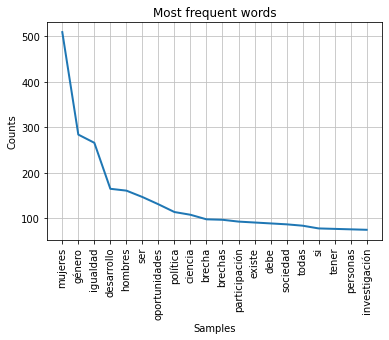

In [ ]:
dataset=""
for i in removing_stw_dataset:
  dataset += "".join(i)

#Counting the frequence of each word in the dataset using nltk
freq = nltk.FreqDist([t for t in dataset.split()])

ct = 0
for key,val in freq.items():
    print (str(key) + ':' + str(val))
    if ct == 10:
      break
    ct=ct+1
plt.title('Most frequent words')
freq.plot(20,  cumulative=False)

## 9. Removing twitter nicknames, emails and numbers

In [ ]:
def removeSpecialChar(text):
    #removing numbers
    text = ''.join([i for i in text if not i.isdigit()])
    #removing mails
    text = re.sub('\S+@\S+','',text)
    #removing twitter user
    text = re.sub('@[^\s]+','',text)
    return text

removeLinesRegex(removeSpecialChar('1232 @holaa23 mc@gmail.com 23223 holaa!'))

'holaa!'

## 10. Word and Sentence Tokenization
Tokenization is the process of breaking a phrase, sentence, paragraph, or entire documents into the smallest unit, such as individual words or terms. And each of these small units is known as tokens.

In [ ]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

print(cleaned_ans)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
chile no necesita una política de igualdad de género y estas son las razones 1 las diferencias en porcentajes de matrículas entre hombres y mujeres no se deben a discriminación sesgos implícitos o estereotipos en contra de la mujer se deben por el contrario a diferencias en intereses entre hombres y mujeres que se derivan de las diferencias sexuales esas diferencias son bien conocidas y se resumen en que los hombres en general se inclinan hacia la sistematización y prefieren trabajar con cosas mientras que las mujeres se inclinan hacia la empatía y prefieren trabajar con personas por tanto la mayor proporción de hombres en carreras de ciencia y tecnología son bien explicadas por las diferencias en intereses académicos así como no existe discriminación en contra de los hombres por su baja representación en carreras de la salud y educación no existe discriminación en contra de l

**Method 1#:** Word tokenizer.

In [ ]:
def wordTokenize(text):
  return word_tokenize(text)

print(wordTokenize(cleaned_ans))

['chile', 'no', 'necesita', 'una', 'política', 'de', 'igualdad', 'de', 'género', 'y', 'estas', 'son', 'las', 'razones', '1', 'las', 'diferencias', 'en', 'porcentajes', 'de', 'matrículas', 'entre', 'hombres', 'y', 'mujeres', 'no', 'se', 'deben', 'a', 'discriminación', 'sesgos', 'implícitos', 'o', 'estereotipos', 'en', 'contra', 'de', 'la', 'mujer', 'se', 'deben', 'por', 'el', 'contrario', 'a', 'diferencias', 'en', 'intereses', 'entre', 'hombres', 'y', 'mujeres', 'que', 'se', 'derivan', 'de', 'las', 'diferencias', 'sexuales', 'esas', 'diferencias', 'son', 'bien', 'conocidas', 'y', 'se', 'resumen', 'en', 'que', 'los', 'hombres', 'en', 'general', 'se', 'inclinan', 'hacia', 'la', 'sistematización', 'y', 'prefieren', 'trabajar', 'con', 'cosas', 'mientras', 'que', 'las', 'mujeres', 'se', 'inclinan', 'hacia', 'la', 'empatía', 'y', 'prefieren', 'trabajar', 'con', 'personas', 'por', 'tanto', 'la', 'mayor', 'proporción', 'de', 'hombres', 'en', 'carreras', 'de', 'ciencia', 'y', 'tecnología', 'son'

**Method 2#:** Sentence tokenizer.

In [ ]:
def sentenceTokenize(text):
  return nltk.sent_tokenize(text)

print(sentenceTokenize(answer))

['Chile no necesita una política de igualdad de género y estas son las razones:\n1.', 'Las diferencias en porcentajes de matrículas entre hombres y mujeres, no se deben a discriminación, sesgos implícitos o estereotipos en contra de la mujer; se deben, por el contrario, a diferencias en intereses entre hombres y mujeres que se derivan de las diferencias sexuales.', 'Esas diferencias son bien conocidas y se resumen en que los hombres, en general, se inclinan hacia la sistematización y prefieren trabajar con cosas; mientras que, las mujeres, se inclinan hacia la empatía y prefieren trabajar con personas.', 'Por tanto, la mayor proporción de hombres en carreras de ciencia y tecnología son bien explicadas por las diferencias en intereses académicos.', 'Así como no existe discriminación en contra de los hombres por su baja representación en carreras de la salud y educación, no existe discriminación en contra de la mujer por su menor representación en áreas de la ciencia y tecnología.', '2.'

# Defining a function for NLP Spanish data cleaning

In [ ]:
def text_preprocessing(text, punctuation = True, LB_whitespaces = True, normalize = True, accent = True, stemming = False, lemmatization = 'spacy', stopwords = True, custom_stopwords = None, twitter_mails_digit = False):
  if punctuation is True:
    text = removePunctWithRegex(text)
  if LB_whitespaces is True:
    text = removeLinesRegex(text)
  if normalize is True:
    text = uncased(text)
  if stopwords is True:
    text = removeStopwords(text)
  if custom_stopwords is not None:
    text = removeStopwords(text=text, stopwords = custom_stopwords)
  if accent is True:
    text = strip_accents(text)
  if stemming is True:
    text = stem(text)
  if lemmatization is 'spacy':
    text,entity = lemmSpacy(text)
  if lemmatization is 'stanza':
    text,entity = lemmStanza(text)

  if twitter_mails_digit is True:
    text = removeSpecialChar(text)
  return wordTokenize(text),entity

If you want to apply the text_preprocessing to a whole corpus, you can use the folliwing method:

In [ ]:
def corpus(dataset, punctuation = True, LB_whitespaces = True, normalize = True, accent = True, stemming = False, lemmatization = 'spacy', stopwords = True, custom_stopwords = None, twitter_mails_digit = False):
  text=[]
  entity=[]
  for j in range(len(dataset)):
    a,b = text_preprocessing(dataset[j], punctuation, LB_whitespaces, normalize, accent, stemming, lemmatization, stopwords, custom_stopwords, twitter_mails_digit)
    if a !='' and b !='':
      text.append(a)
      entity.append(b)
  text = list(filter(lambda x: x != [], text))
  entity = list(filter(lambda x: x != [], entity))
  return text,entity

# Example

In [ ]:
#!pip install -r requirements.txt

In [ ]:
#import data_cleaning.spanish as sp

In [ ]:
sentence = 'La cordillera es un sector de latinoamérica muy lindo. Tiene mucha naturaleza, animales y paisajes. ¡Quiero visitarla pronto, antes de tener que irme a vivir a otro lugar! :('

cleaned_sent, entity = text_preprocessing(sentence)
print(f'cleaned sentence: {cleaned_sent}')
print(f'entity detected: {entity}')

cleaned sentence: ['cordillerar', 'sector', 'latinoamerico', 'lindo', 'mucho', 'naturaleza', 'animal', 'paisaje', 'querer', 'visitar', 'él', 'pronto', 'tener', 'ir', 'yo', 'vivir', 'lugar']
entity detected: [('cordillera sector latinoamerica', 'LOC')]


In [ ]:
document = sentenceTokenize(sentence)
print(f'corpus: {document}')
cleaned_doc,entities = corpus(dataset=document)
print(f'cleaned corpus: {cleaned_doc}')
print(f'entities detected: {entities}')

corpus: ['La cordillera es un sector de latinoamérica muy lindo.', 'Tiene mucha naturaleza, animales y paisajes.', '¡Quiero visitarla pronto, antes de tener que irme a vivir a otro lugar!', ':(']
cleaned corpus: [['cordillerar', 'sector', 'latinoamerico', 'lindo'], ['mucho', 'naturaleza', 'animal', 'paisaje'], ['querer', 'visitar', 'él', 'pronto', 'tener', 'ir', 'yo', 'vivir', 'lugar']]
entities detected: [[('cordillera sector latinoamerica lindo', 'LOC')]]
